# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
bcc=pd.read_csv('breast-cancer-wisconsin-data.csv')

In [3]:
bcc.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [5]:
bcc.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [6]:
bcc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [7]:
bcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [8]:
bcc['Bare Nuclei'].value_counts()


1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [9]:
# We could see "?" values in column, this should be removed from data set
bcc['Bare Nuclei'].value_counts()

# Check for missing value in any other column
bcc.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [10]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
bcc[bcc['Bare Nuclei'] =="?"]


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [11]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [12]:
bcc['Bare Nuclei'].mode()

0    1
dtype: object

In [13]:
bcc['Bare Nuclei'].replace('?',bcc['Bare Nuclei'].mode().loc[0],inplace=True)
#to verify the replace values


In [14]:
bcc[bcc['Bare Nuclei'] =="?"]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


In [15]:
bcc['Bare Nuclei']

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
23      1
24      1
25      7
26      1
27      1
28      1
29      1
       ..
669     5
670     8
671     1
672     1
673     1
674     1
675     1
676     1
677     1
678     1
679     1
680    10
681    10
682     1
683     1
684     1
685     1
686     1
687     1
688     1
689     1
690     1
691     5
692     1
693     1
694     2
695     1
696     3
697     4
698     5
Name: Bare Nuclei, Length: 699, dtype: object

In [16]:
bcc['Bare Nuclei'].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [17]:
bcc['Bare Nuclei']=bcc['Bare Nuclei'].astype(int,inplace=True)

In [18]:
bcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


In [19]:
#verify for the duplicat values
bcc.duplicated().value_counts()


False    690
True       9
dtype: int64

In [20]:
bcc[bcc.duplicated(keep=False)]['ID']

42     1100524
62     1116116
168    1198641
207    1218860
208    1218860
253    1100524
254    1116116
258    1198641
267     320675
272     320675
314     704097
321     733639
322     733639
338     704097
560    1321942
561    1321942
683     466906
684     466906
Name: ID, dtype: int64

In [21]:
bcc.drop_duplicates(inplace=True)

In [22]:
bcc.duplicated().value_counts()

False    690
dtype: int64

In [23]:
bcc.drop('ID',axis=1,inplace=True)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [24]:
# Check for correlation of variable
bcc.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947
Class,0.716812,0.817586,0.817551,0.701175,0.681063,0.816655,0.756736,0.715363,0.423947,1.000000


In [25]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

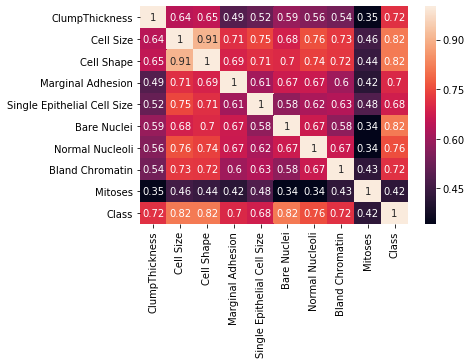

In [26]:
sns.heatmap(bcc.corr(),annot=True)

In [27]:
#Let us check for pair plots

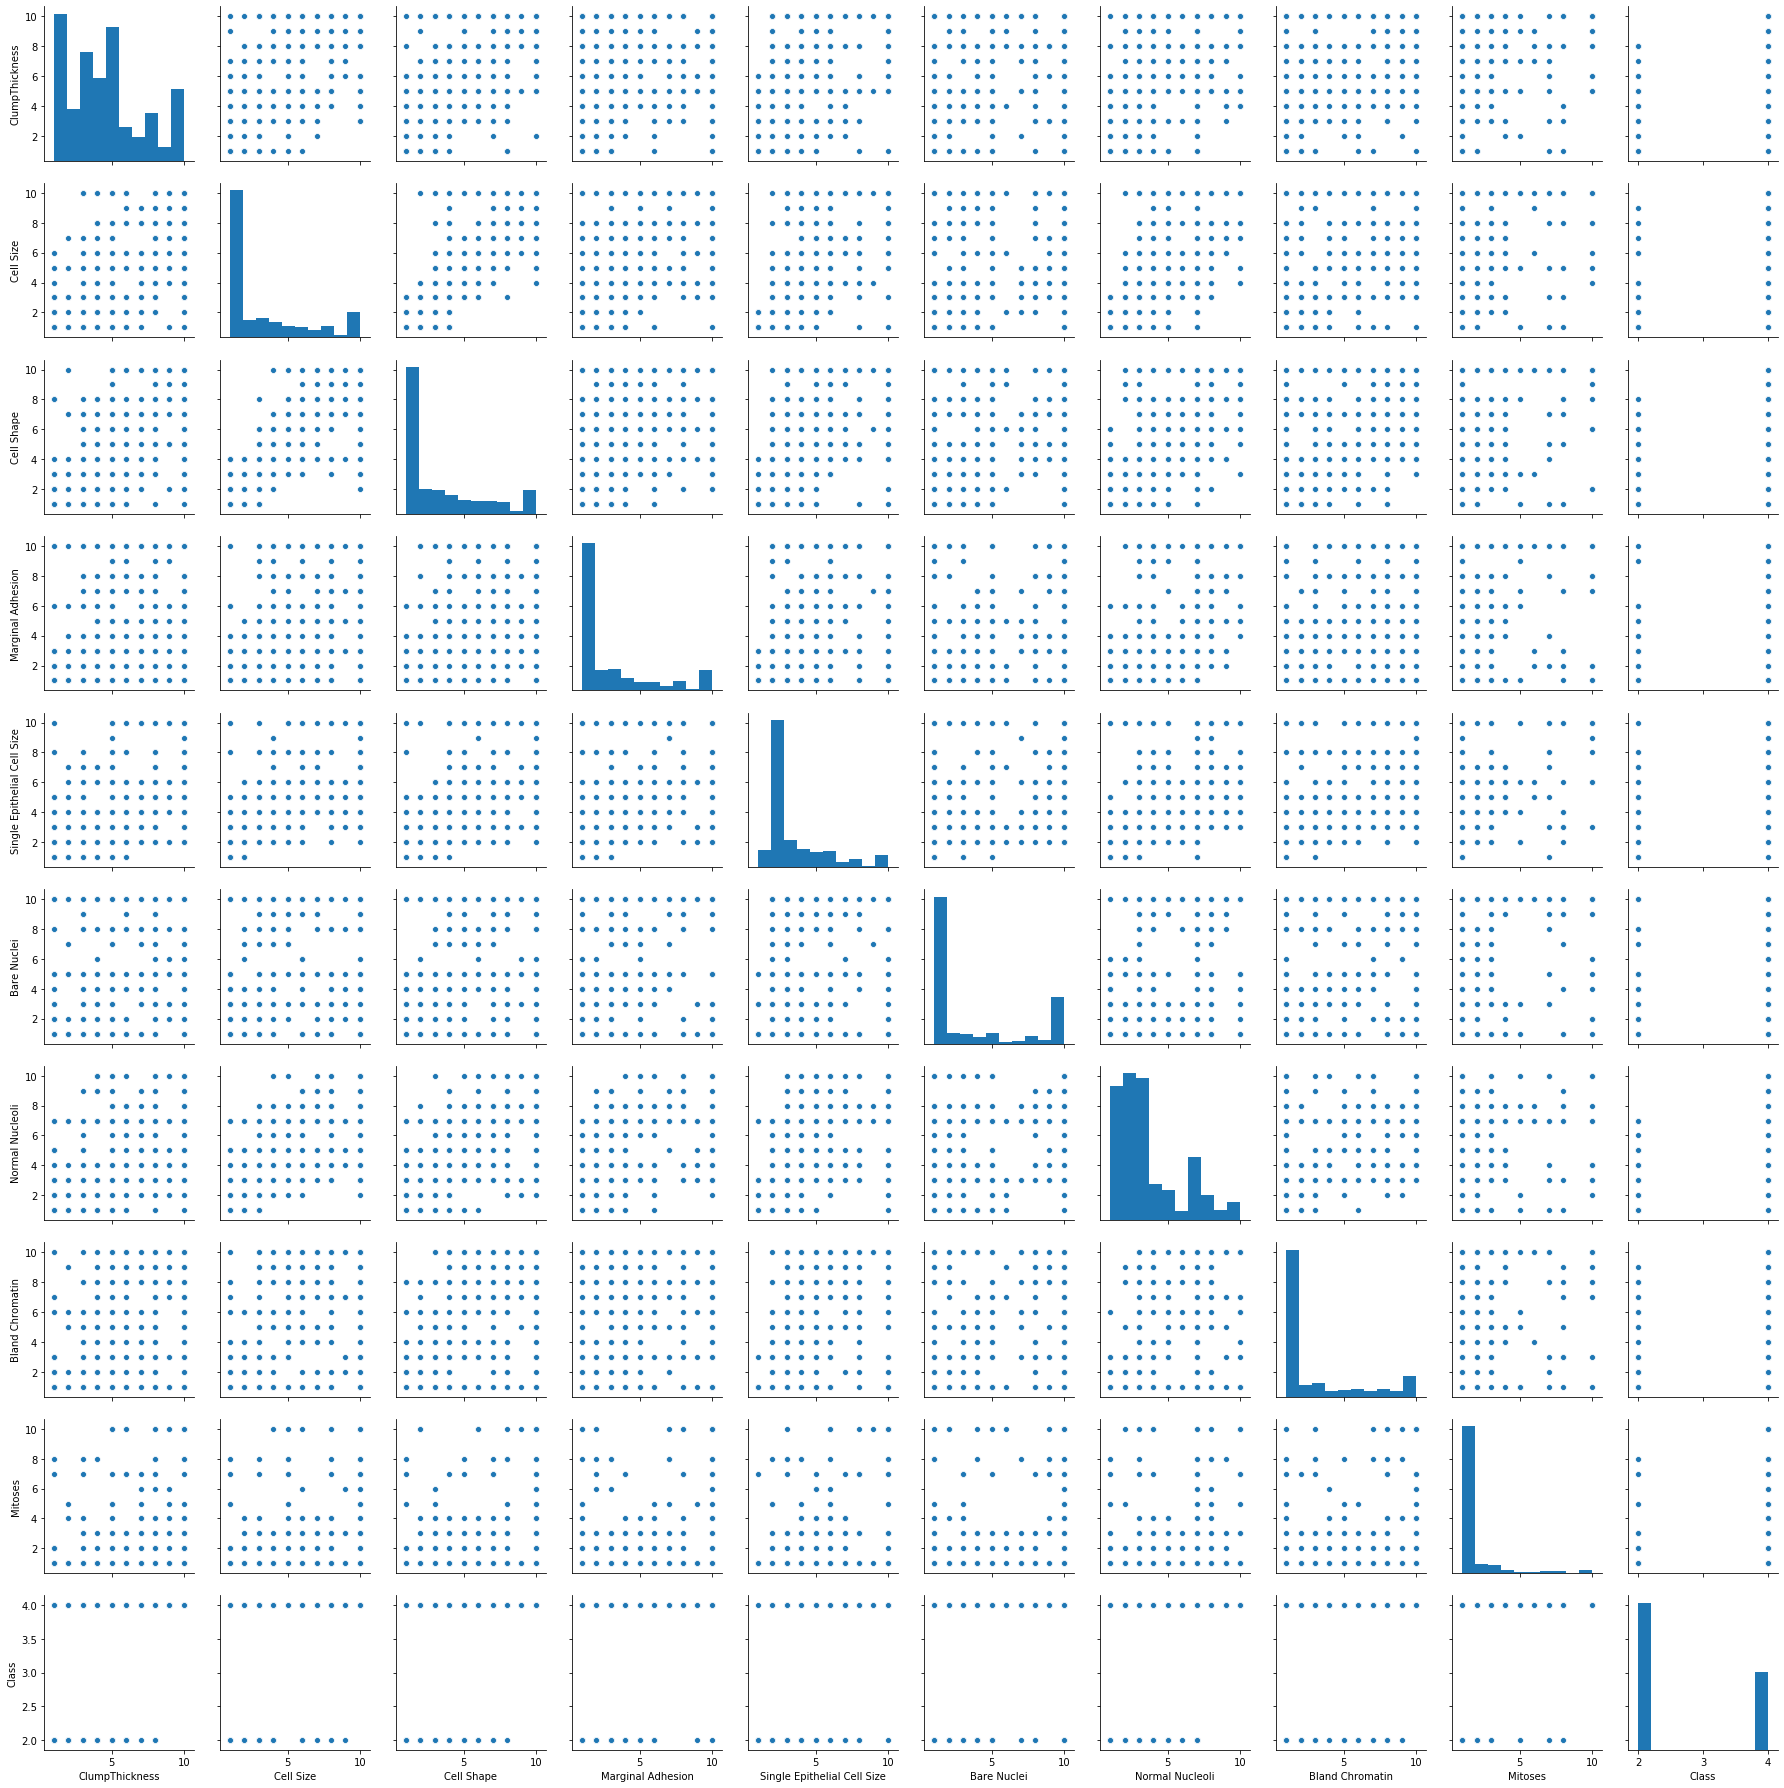

In [28]:
sns.pairplot(bcc)

In [29]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

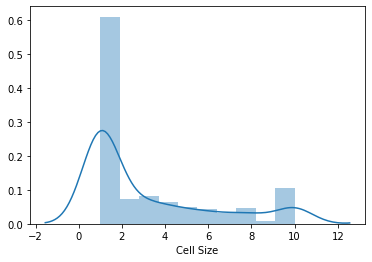

In [30]:
sns.distplot(bcc['Cell Size'])

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [31]:
# We could see most of the outliers are now removed.

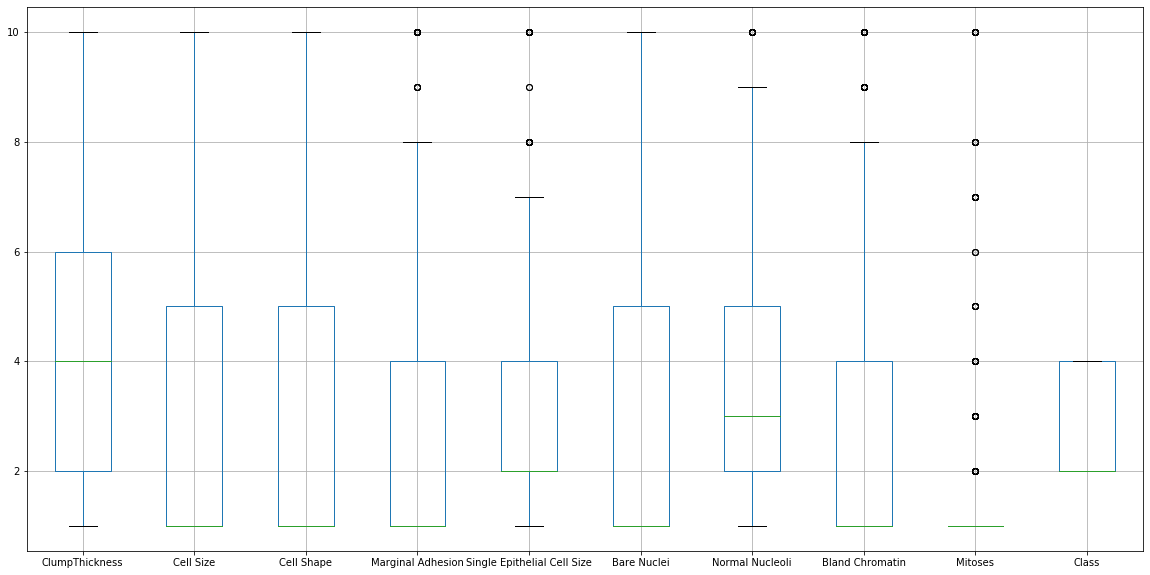

In [32]:
bcc.boxplot(figsize=(20,10))

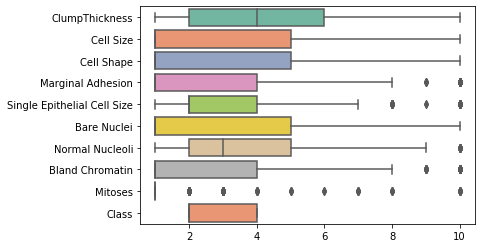

In [33]:
sns.boxplot(data=bcc, orient='h',palette="Set2")

###  we have outliers for Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses from box plolt 

In [34]:
#cors  to get the outlier
pd.crosstab(bcc['Marginal Adhesion'],bcc['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [35]:
pd.crosstab(bcc['Single Epithelial Cell Size'],bcc['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [36]:
pd.crosstab(bcc['Normal Nucleoli'],bcc['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [37]:
pd.crosstab(bcc['Bland Chromatin'],bcc['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [38]:
pd.crosstab(bcc['Mitoses'],bcc['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [39]:
###after Crosstab for Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses to remove the 
outlire ,replace the every value to 4 for every row enrty avobe 4
eg-Mitoses=6 will upate with 4.

SyntaxError: invalid syntax (<ipython-input-39-0263f092f8be>, line 2)

In [ ]:
bcc['Marginal Adhesion']=np.where(bcc["Marginal Adhesion"]>4,4,bcc['Marginal Adhesion'])

In [ ]:
pd.crosstab(bcc['Marginal Adhesion'],bcc['Class'])

In [ ]:
bcc['Single Epithelial Cell Size']=np.where(bcc["Single Epithelial Cell Size"]>4,4,bcc['Single Epithelial Cell Size'])

In [ ]:
pd.crosstab(bcc['Single Epithelial Cell Size'],bcc['Class'])

In [ ]:
bcc['Normal Nucleoli']=np.where(bcc["Normal Nucleoli"]>4,4,bcc['Normal Nucleoli'])

In [ ]:
pd.crosstab(bcc['Normal Nucleoli'],bcc['Class'])

In [ ]:
bcc['Bland Chromatin']=np.where(bcc["Bland Chromatin"]>4,4,bcc['Bland Chromatin'])

In [ ]:
pd.crosstab(bcc['Bland Chromatin'],bcc['Class'])

In [ ]:
bcc['Mitoses']=np.where(bcc["Mitoses"]>2,2,bcc['Mitoses'])

In [ ]:
pd.crosstab(bcc['Mitoses'],bcc['Class'])

In [ ]:
sns.boxplot(data=bcc, orient='h',palette="Set2")

In [ ]:
bcc.drop('Class',axis=1,inplace=True)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
bcc=scaler.fit_transform(bcc)
bcc

we can see that outlaiers are removed

# Q6 Create a covariance matrix for identifying Principal components

In [ ]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix=np.cov(bcc.T)


In [ ]:
cov_matrix

# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [ ]:
eigval,eigenvec=np.linalg.eig(cov_matrix)

In [ ]:
print(eigenvec)

In [ ]:
print(eigval)

# Q8 Find variance and cumulative variance by each eigen vector

In [ ]:
print(eigenvec.var())

In [ ]:
tot = sum(eigval)
var_exp = [( i /tot ) * 100 for i in sorted(eigval, reverse=True)]
cum_var_exp = np.cumsum(eigval)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [42]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(bcc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [43]:
pca.components_

array([[ 2.96007077e-01,  3.99675890e-01,  3.87291565e-01,
         3.32056179e-01,  2.45832336e-01,  4.35624238e-01,
         2.91135040e-01,  3.56474199e-01,  1.23331220e-01,
         1.23031954e-01],
       [-8.23011974e-02,  2.30524836e-01,  1.70955247e-01,
        -1.00691494e-01,  1.87745283e-01, -7.79425765e-01,
         2.48050660e-02,  4.78962753e-01,  1.61955486e-01,
        -4.14407518e-02],
       [-8.53695365e-01, -1.46667556e-02, -6.53393053e-02,
         4.79256896e-01,  6.55881539e-02,  1.00267992e-01,
         9.87975162e-02,  1.03439530e-01,  3.02275482e-02,
        -3.60949538e-02],
       [ 1.17726186e-01,  2.60627989e-01,  1.74117027e-01,
         4.38382097e-01,  1.72157475e-01, -3.24440196e-01,
        -3.90153315e-02, -7.28018024e-01,  1.69368776e-01,
        -2.44976555e-02],
       [ 3.58377738e-01, -3.80427793e-01, -4.09908532e-01,
         5.60829351e-01, -1.02206530e-01, -1.03111168e-01,
        -1.72860073e-01,  2.72915099e-01,  3.44654587e-01,
        -7.

In [44]:
df_PCA = pd.DataFrame(pca.components_,columns=list(bcc))

# Q10 Find correlation between components and features

In [45]:
df_PCA.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.026006,-0.004007,0.034176,0.025507,-0.004111,-0.025204,0.012589,0.012577,-0.018074
Cell Size,0.026006,1.000000,0.033513,-0.285831,-0.213328,0.034384,0.210797,-0.105292,-0.105190,0.151165
Cell Shape,-0.004007,0.033513,1.000000,0.044041,0.032870,-0.005298,-0.032480,0.016223,0.016208,-0.023292
Marginal Adhesion,0.034176,-0.285831,0.044041,1.000000,-0.280346,0.045186,0.277019,-0.138369,-0.138235,0.198654
Single Epithelial Cell Size,0.025507,-0.213328,0.032870,-0.280346,1.000000,0.033724,0.206752,-0.103271,-0.103171,0.148265
Bare Nuclei,-0.004111,0.034384,-0.005298,0.045186,0.033724,1.000000,-0.033324,0.016645,0.016629,-0.023897
Normal Nucleoli,-0.025204,0.210797,-0.032480,0.277019,0.206752,-0.033324,1.000000,0.102046,0.101947,-0.146505
Bland Chromatin,0.012589,-0.105292,0.016223,-0.138369,-0.103271,0.016645,0.102046,1.000000,-0.050922,0.073178
Mitoses,0.012577,-0.105190,0.016208,-0.138235,-0.103171,0.016629,0.101947,-0.050922,1.000000,0.073107
Class,-0.018074,0.151165,-0.023292,0.198654,0.148265,-0.023897,-0.146505,0.073178,0.073107,1.000000


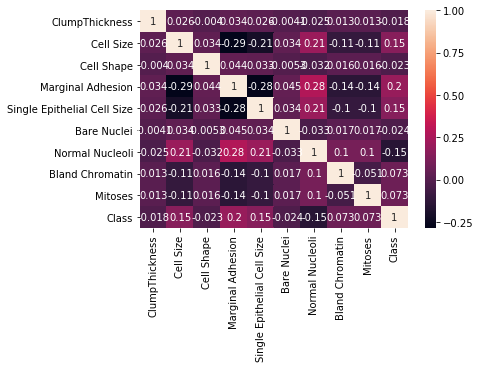

In [46]:
sns.heatmap(df_PCA.corr(),annot=True)

In [384]:
df_PCA.head(5)

,0.202823,-0.701698,-0.745040,-0.781803,-0.616796,-0.686858,0.322808,-0.718310,-0.456515
,0.202823,0.285065,0.268920,1.530101,1.459249,1.803153,0.322808,0.046557,-0.456515
,-0.507572,-0.701698,-0.745040,-0.781803,-0.616796,-0.410190,0.322808,-0.718310,-0.456515
,0.558020,1.600748,1.620866,-0.781803,0.421227,0.143146,0.322808,1.576291,-0.456515
,-0.152375,-0.701698,-0.745040,0.759466,-0.616796,-0.686858,0.322808,-0.718310,-0.456515
,1.268415,2.258590,2.296839,1.530101,1.459249,1.803153,1.203193,1.576291,-0.456515
,-1.217967,-0.701698,-0.745040,-0.781803,-0.616796,1.803153,0.322808,-0.718310,-0.456515
,-0.862769,-0.701698,-0.407053,-0.781803,-0.616796,-0.686858,0.322808,-0.718310,-0.456515
,-0.862769,-0.701698,-0.745040,-0.781803,-0.616796,-0.686858,-1.437962,-0.718310,2.190507
,-0.152375,-0.372777,-0.745040,-0.781803,-0.616796,-0.686858,-0.557577,-0.718310,-0.456515
,-1.217967,-0.701698,-0.745040,-0.781803,-1.654818,-0.686858,0.322808,-0.718310,-0.456515


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [47]:
jokes=pd.read_csv('jokes.csv')
jokes

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [48]:
jokes.shape

(24983, 101)

In [49]:
rt=jokes.iloc[0:200,1:]

In [50]:
rt.shape

(200, 100)

In [51]:
rt.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [52]:
rt2=rt.replace(99,0)

In [53]:
rt2.head(5)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [54]:
rt2.iloc[:,0].mean()

0.5300499999999997

In [55]:
rt2.iloc[:,1].mean()

0.5938999999999995

In [56]:
rt_mean=rt2.mean()

In [57]:
rt_mean.head()

Joke1    0.53005
Joke2    0.59390
Joke3    0.23765
Joke4   -0.70100
Joke5   -0.03790
dtype: float64

In [58]:
rt_mean.sort_values(ascending=False).head(10)
#top 10 jokes are as per the rating 

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64